In [1]:
# Import necessary modules
import numpy as np
from pandas_datareader import data
from scipy.optimize import minimize

In [2]:
# Define the assets in the portfolio and retrieve their data
assets = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB', 'BRK-B', 'JNJ', 'V', 'PG', 'JPM']
prices = data.DataReader(assets, 'yahoo', start='2010-01-01')['Adj Close']

In [3]:
# Calculate the daily returns of the assets
returns = prices.pct_change()
returns=returns.dropna(0)
returns.head()

C:\Users\anxitywa\AppData\Local\Temp\ipykernel_24712\1345281188.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  returns=returns.dropna(0)


Symbols,AAPL,MSFT,GOOGL,AMZN,FB,BRK-B,JNJ,V,PG,JPM
Date,,,,,,,,,,
2021-12-13,-0.020674,-0.009167,-0.014696,-0.015356,0.014374,0.006176,0.017886,-0.011153,0.014216,-0.011889
2021-12-14,-0.008023,-0.032587,-0.013163,-0.002807,-0.002242,0.017310,0.010923,-0.004928,0.003679,0.007662
2021-12-15,0.028509,0.019218,0.017609,0.024978,0.023731,-0.001525,0.004992,0.011096,0.003855,-0.007478
2021-12-16,-0.039264,-0.029135,-0.013630,-0.025641,-0.019786,0.018976,0.010927,0.009703,0.014164,0.015639
2021-12-17,-0.006502,-0.003386,-0.018831,0.006789,-0.003314,-0.021688,-0.027628,-0.011615,-0.022655,-0.022754


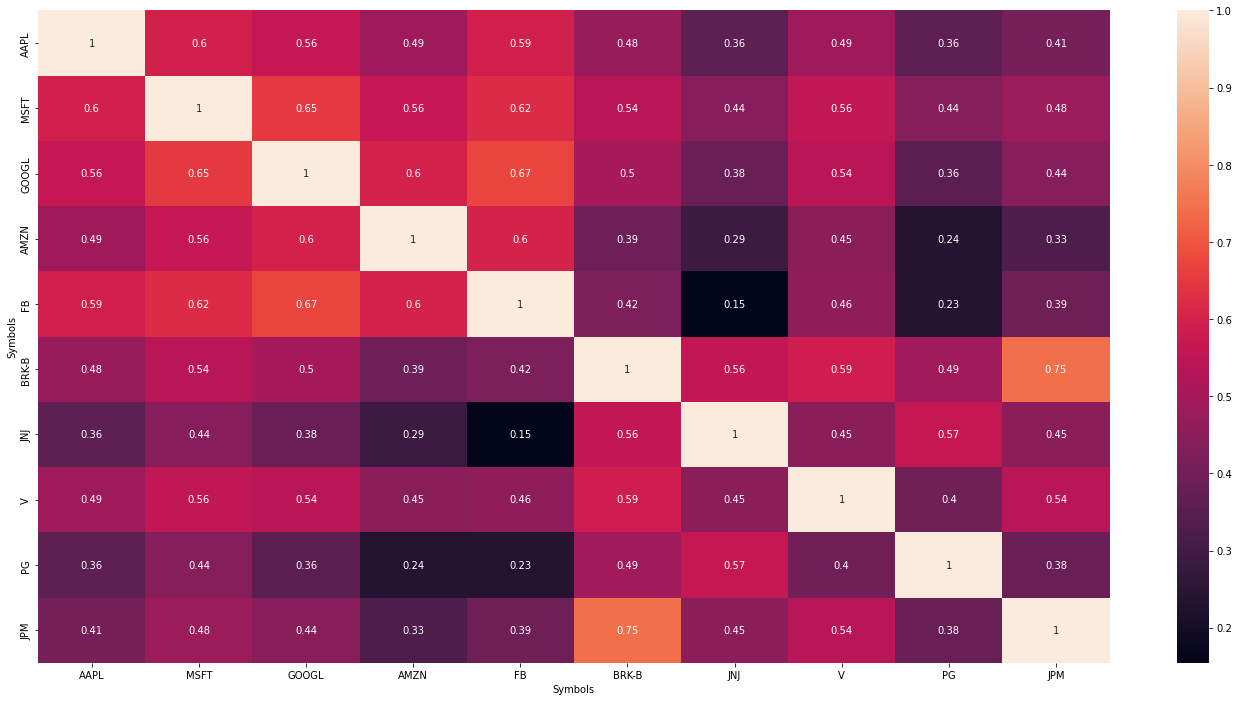

In [13]:
# correlation_matrix to look at correlation between the funds
import seaborn as sns
plt.rcParams["figure.figsize"] = (24, 12)
sns.heatmap(returns.corr(),annot=True);

In [12]:
# Estimate the average return and covariance of the stocks
mean_returns = returns.mean()
cov_matrix = returns.cov()
rfr = 0

#Define the optimization function
def maximize_sharpe_ratio(weights):
    returns = np.dot(mean_returns, weights)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (returns -rfr) / std
    return -sharpe_ratio

# Define a function to calculate the portfolio return for a given set of weights
def portfolio_return(weights, returns):
    portfolio_return = np.sum(returns * weights)
    return portfolio_return

# Define a function to calculate the portfolio volatility for a given set of weights
def portfolio_volatility(weights, cov_matrix):
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_volatility

# Define the constraints for the optimization
constraints = [
    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1} # Sum of weights must be 1
]

# Define the bounds for the optimization
bounds = [(0, 1)] * len(mean_returns)

# Set the initial value for the weights
init_guess = [1/len(mean_returns)] * len(mean_returns)

# Run the optimization
results = minimize(
    maximize_sharpe_ratio,
    init_guess,
    method='SLSQP', # Use the Sequential Least SQuares Programming (SLSQP) 
    bounds=bounds,
    constraints=constraints
)

# Get the optimized weights
optimal_weights = results.x

# Calculate the maximum Sharpe ratio
max_sharpe_ratio = -results.fun

print(f'Optimal weights: {optimal_weights}')
print(f'Maximum Sharpe ratio: {max_sharpe_ratio}')

# Calculate the returns and volatility for the optimal portfolio
optimal_return = portfolio_return(results.x, returns)
optimal_volatility = portfolio_volatility(results.x, cov_matrix)

# Plot the efficient frontier
#plt.scatter(optimal_volatility, optimal_return, marker='X')
#plt.show()
#optimal_volatility
#optimal_return

Optimal weights: [3.29521881e-01 1.92825370e-02 1.28152697e-16 1.31751996e-01
 0.00000000e+00 4.52383356e-16 2.06189833e-01 1.59499846e-01
 1.53753908e-01 0.00000000e+00]
Maximum Sharpe ratio: 0.07047257759238147


0.011647885628534563

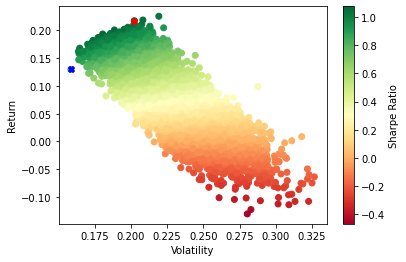

In [10]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data

# Get data for the top 10 stocks in the S&P 500
# Define the assets in the portfolio and retrieve their data
assets = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB', 'BRK-B', 'JNJ', 'V', 'PG', 'JPM']
prices = data.DataReader(assets, 'yahoo', start='2010-01-01')['Adj Close']

# Calculate the return and covariance of the stock data
returns = prices.pct_change()
covariance = returns.cov()

# Set the number of assets in the portfolio
num_assets = 10

# Set the initial portfolio weights
weights = np.array([1/num_assets] * num_assets)

# Calculate the expected return and standard deviation of the portfolio
portfolio_return = np.sum(returns.mean() * weights) * 252
portfolio_std = np.sqrt(np.dot(weights.T, np.dot(covariance, weights))) * np.sqrt(252)

# Set the range of random weights to test
weights_range = 10000

# Initialize empty lists to store the results
portfolio_returns = []
portfolio_volatilities = []

# Generate random weights and calculate the return and volatility of the portfolio
for single_random_weight in range(weights_range):
    weights = np.array([np.random.random() for i in range(num_assets)])
    weights /= np.sum(weights)
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(covariance, weights))) * np.sqrt(252)
    portfolio_returns.append(portfolio_return)
    portfolio_volatilities.append(portfolio_std)

# Convert the lists to arrays
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

# define  risk free rate
portfolio_risk_free_rate = 0

# Calculate the Sharpe ratio for each portfolio
sharpe_ratios = (portfolio_returns - portfolio_risk_free_rate) / portfolio_volatilities

# Find the portfolio with the maximum Sharpe ratio
max_sharpe_idx = np.argmax(sharpe_ratios)

# Find the portfolio with the minimum volatility
min_volatility_idx = np.argmin(portfolio_volatilities)

# Plot the efficient frontier with the random portfolios
plt.scatter(portfolio_volatilities, portfolio_returns, c=sharpe_ratios, cmap='RdYlGn')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Mark the portfolios with the maximum Sharpe ratio and minimum volatility
plt.scatter(portfolio_volatilities[max_sharpe_idx], portfolio_returns[max_sharpe_idx], marker='X', color='r')
plt.scatter(portfolio_volatilities[min_volatility_idx], portfolio_returns[min_volatility_idx], marker='X', color='b')